In [1]:
# Movie prediction using collaborative filtering.

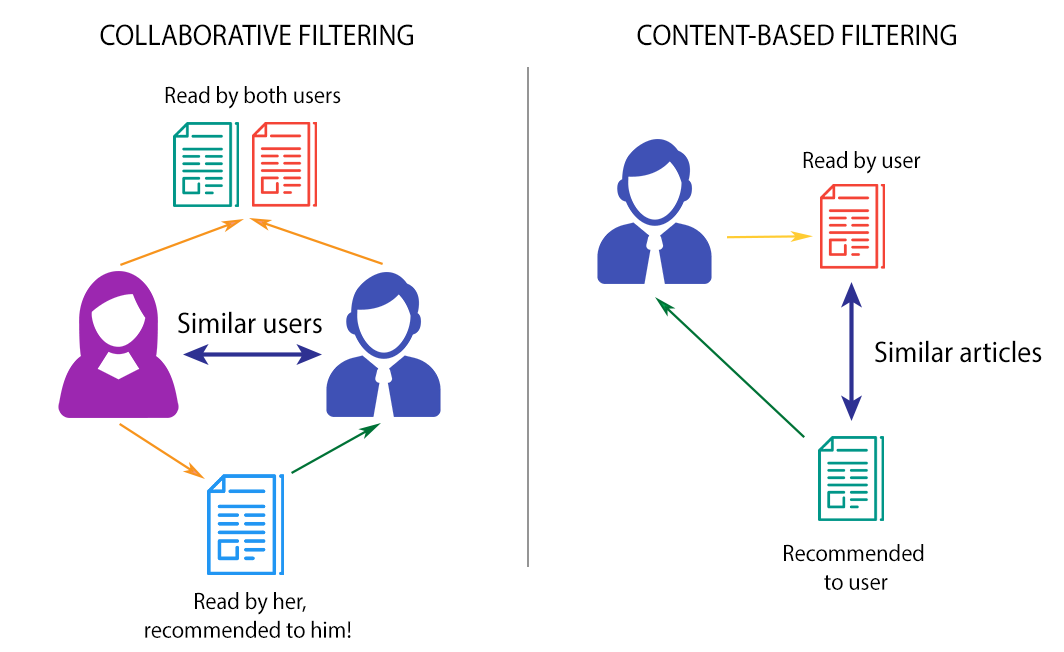

In [1]:
import pandas as pd

In [5]:
df_movies = pd.read_csv('data/movies.csv')
df_ratings = pd.read_csv('data/ratings.csv')

In [9]:
df_movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [6]:
df_ratings.head(4)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815


In [7]:
"""user_id , movie_id , rating
1           1           5
1           2           .5
1           3            4
1      
2
"""

'user_id , movie_id , rating\n1           1           5\n1           2           .5\n1           3            4\n1      \n2\n'

### Exploratory Data analysis

In [8]:
df_ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
# Merging movie df and rating df together
movie_rating = pd.merge(df_movies, df_ratings, on='movieId')

In [11]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [14]:
movie_rating['title'].value_counts()[:15]

Forrest Gump (1994)                                      329
Shawshank Redemption, The (1994)                         317
Pulp Fiction (1994)                                      307
Silence of the Lambs, The (1991)                         279
Matrix, The (1999)                                       278
Star Wars: Episode IV - A New Hope (1977)                251
Jurassic Park (1993)                                     238
Braveheart (1995)                                        237
Terminator 2: Judgment Day (1991)                        224
Schindler's List (1993)                                  220
Fight Club (1999)                                        218
Toy Story (1995)                                         215
Star Wars: Episode V - The Empire Strikes Back (1980)    211
American Beauty (1999)                                   204
Usual Suspects, The (1995)                               204
Name: title, dtype: int64

In [21]:
movie_rating.groupby('title')['rating'].agg(['mean','count']).sort_values(by='count', ascending=False)[:10]

,mean,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


<Axes: title={'center': 'Bar plot showing rating frequency'}, ylabel='rating'>

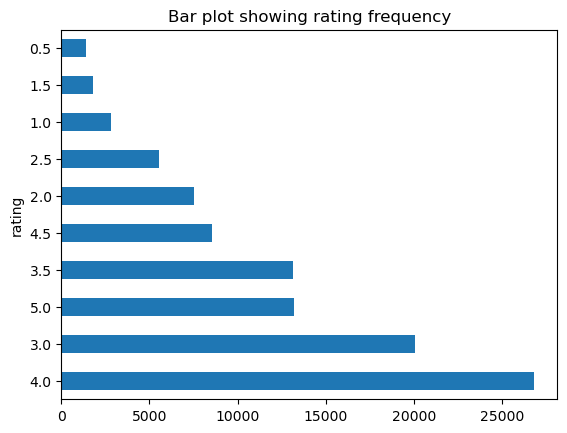

In [22]:
movie_rating.value_counts('rating').plot(kind='barh',title='Bar plot showing rating frequency')

### Data preprocessing

In [24]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [25]:
cols_2_drop = ['title','genres','timestamp']
movie_rating_clean = movie_rating.drop(cols_2_drop,axis=1, inplace=False)

In [27]:
movie_rating_clean.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


In [28]:
# Pivot table

movie_user_df = pd.pivot_table(movie_rating, values='rating',index='movieId', columns='userId',fill_value=0)

In [29]:
movie_user_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4,0.0,0.0,0,4,0,4.5,0,0,0.0,...,4.0,0,4,3,4.0,2.5,4,2.5,3,5.0
2,0,0.0,0.0,0,0,4,0.0,4,0,0.0,...,0.0,4,0,5,3.5,0.0,0,2.0,0,0.0
3,4,0.0,0.0,0,0,5,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,2.0,0,0.0
4,0,0.0,0.0,0,0,3,0.0,0,0,0.0,...,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0
5,0,0.0,0.0,0,0,5,0.0,0,0,0.0,...,0.0,0,0,3,0.0,0.0,0,0.0,0,0.0


In [31]:
from sklearn.neighbors import NearestNeighbors

nn_algo = NearestNeighbors(metric='cosine')
nn_algo.fit(movie_user_df)

NearestNeighbors(metric='cosine')

In [32]:
# # Recomendation engine core

# class Recommender():
#     def __init__(self):
#         self.hist=[]
#         self.ishit = False # History if history is empty
 
#     def recommend_movie(self,movie_name,nos=5):
#         movieId = movies_df.loc[movies_df['title'] == movie_name]['movieId'].index[0]
#         self.hist.append(movieId)
#         distance,neighbors = nn_algo.kneighbors([movie_user_df.loc[movieId]],n_neighbors=nos+1)
#         movieids = [movie_user_df.iloc[i].name for i in neighbors[0]]
#         movie_title_list = []
#         for ids in movieids:
#             movie_title = movies_df.loc[movies_df.movieId==ids]['title'].item()
#             movie_title_list.append(movie_title)
        
#         print('\n'.join(movie_title_list))

In [36]:
def recommend_movie(movie_name, nos=5):
    """
    The function returns the number of (nos) movies the user 
    unwatched. 
    
    input/-
    movie_name = Movie title as in dataset
    nos = Number of recommendation titles wanted.
    """
    movieId = df_movies.loc[df_movies['title'] == movie_name]['movieId'].index[0]
    distance, neighbors = nn_algo.kneighbors([movie_user_df.loc[movieId]],n_neighbors=nos+1)
    movieids = [movie_user_df.iloc[i].name for i in neighbors[0]]
    movie_title_list = []
    for ids in movieids:
            movie_title = df_movies.loc[df_movies.movieId==ids]['title'].item()
            movie_title_list.append(movie_title)
    print('\n'.join(movie_title_list))

In [40]:
recommend_movie('Titanic (1997)',10)

Indiana Jones and the Last Crusade (1989)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Indiana Jones and the Temple of Doom (1984)
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)
Die Hard (1988)
Terminator, The (1984)
Star Wars: Episode IV - A New Hope (1977)
Back to the Future (1985)
Ghostbusters (a.k.a. Ghost Busters) (1984)
Aliens (1986)


In [38]:
# Getting the actual title 
df_movies[df_movies['title'].str.lower().str.contains('titanic ')]

,movieId,title,genres
1291,1721,Titanic (1997),Drama|Romance
2542,3403,Raise the Titanic (1980),Drama|Thriller
2543,3404,Titanic (1953),Action|Drama
